<a href="https://colab.research.google.com/github/Ashraf-Saleh/Fault-Detect/blob/Trial-branch/Fault_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import numpy
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras 
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout, Activation, BatchNormalization,Concatenate, merge
from keras.utils.np_utils import to_categorical
from keras.models import model_from_json
from keras.utils import plot_model
import tensorflow as tf
import random, os
import multiprocessing as mp
from queue import Empty
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Data_X = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_X_Sample.npy",None,allow_pickle=True)
Data_Y = numpy.load("/content/drive/My Drive/Colab_Data/Fault_Detect/Train_Y_Sample.npy",None,allow_pickle=True)

In [4]:
#Train_X = Data_X
#Train_Y = Data_Y
Train_X = Data_X[:int(len(Data_X)*0.4)]
Train_Y = Data_Y[:int(len(Data_Y)*0.4)]
Vald_X = Data_X[int(len(Data_X)*0.4):int(len(Data_X)*0.7)]
Vald_Y = Data_Y[int(len(Data_Y)*0.4):int(len(Data_Y)*0.7)]
Test_X = Data_X[int(len(Data_X)*0.7):]
Test_Y = Data_Y[int(len(Data_Y)*0.7):]
 
print(len(Data_X))
print(len(Train_X))
print(len(Vald_X))
print(len(Test_X))
 
print(Data_X.shape)
print(Data_Y.shape)

22950
9180
6884
6886
(22950, 5, 5000, 1)
(22950, 9)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None, 5, 5000, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 2451, 5)        505       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 2352, 5)        2505      
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 588, 5)         0         
_________________________________________________________________
flatten (Flatten)            (None, 14700)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                940864    
_________________________________________________________________
dense_1 (Dense)              (None, 52)                3380  

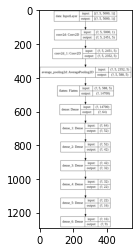

In [5]:
inputs = keras.Input(shape = (Train_X.shape[1], Train_X.shape[2], Train_X.shape[3]), name="data")
 
x = layers.Conv2D(filters = 5, kernel_size = (1, 100), strides = (1, 2), padding = 'valid', activation = 'relu')(inputs)
x = layers.Conv2D(filters = 5, kernel_size = (1, 100), strides = (1, 1), padding = 'valid', activation = 'relu')(x)
x = layers.AveragePooling2D(pool_size = (1,4)) (x)
#x = layers.Conv2D(filters = 100, kernel_size = (2, 100), strides = (1, 1), padding = 'valid', activation = 'relu')(x)
#x = layers.Conv2D(filters = 150, kernel_size = (1, 100), strides = (1, 1), padding = 'valid', activation = 'relu')(x)
#x = layers.MaxPooling2D(pool_size = (1,4)) (x)
#x = layers.Conv2D(filters = 50, kernel_size = (2, 100), strides = (1, 1), padding = 'valid', activation = 'relu')(x)
#x = layers.Conv2D(filters = 50, kernel_size = (1, 100), strides = (1, 1), padding = 'valid', activation = 'relu')(x)
#x = layers.MaxPooling2D(pool_size = (1,4))(x)
#x = layers.Conv2D(filters = 50, kernel_size = (2, 10), strides = (1, 1), padding = 'valid', activation = 'relu')(x)
#x = layers.Conv2D(filters = 50, kernel_size = (1, 3), strides = (1, 1), padding = 'valid', activation = 'relu')(x)
#x = layers.MaxPooling2D(pool_size = (1,2))(x)
#x = layers.Conv2D(filters = 25, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', activation = 'relu')(x)
#x = layers.Conv2D(filters = 25, kernel_size = (1, 1), strides = (1, 1), padding = 'valid', activation = 'relu')(x)
#x = layers.MaxPooling2D(pool_size = (1,1))(x)
x = layers.Flatten()(x)
#x = layers.Conv2D(filters = 21, kernel_size = (3, 100), activation='relu') (x)
#block_1_output = layers.MaxPooling2D(pool_size = (1,4)) (x)
 
#x = layers.Conv2D(filters = 11, kernel_size = (2, 200), activation="relu", padding="same")(block_1_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)
#block_2_output = layers.add([x, block_1_output])
 

#x = layers.Conv2D(filters = 21,kernel_size= (1, 50), activation="relu", padding="same")(block_2_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 70), activation="relu", padding="same")(x)
#block_3_output = layers.add([x, block_2_output])


#x = layers.Conv2D(filters = 11, kernel_size = (2, 20), activation="relu", padding="same")(block_3_output)
#x = layers.Conv2D(filters = 21, kernel_size = (2, 20), activation="relu", padding="same")(x)

#block_6_output = layers.add([x, block_3_output])
 
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(block_6_output)
#x = layers.Conv2D(filters = 21,kernel_size= (1, 20), activation="relu", padding="same")(x)
#block_7_output = layers.add([x, block_6_output])

#x = layers.MaxPooling2D(pool_size = (1,4)) (block_7_output) 




x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(52, activation="relu")(x)
x = layers.Dense(42, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(22, activation="relu")(x)
#block_4_output = layers.Dense(16, activation="relu")(x)
 
#x = layers.Dense(16, activation="relu")(block_4_output)
#x = layers.Dense(16, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)
#block_5_output = layers.add([x, block_4_output])
 
#x = block_5_output
#x = layers.Dropout(0.5)(x)
outputs = layers.Dense(Train_Y.shape[1], activation='softmax')(x)
 
 
model = keras.Model(inputs, outputs, name="model")
 
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])
 
model.summary()
plot_model(model, to_file='/content/drive/My Drive/Colab_Data/Fault_Detect/model.png',show_shapes=True)
plt.imshow(mpimg.imread('/content/drive/My Drive/Colab_Data/Fault_Detect/model.png'))

In [6]:
history = model.fit(Train_X, Train_Y, epochs=200,batch_size = 200, verbose=2, validation_data=(Vald_X,Vald_Y))

Epoch 1/200
46/46 - 3s - loss: 1.3579 - accuracy: 0.3836 - val_loss: 0.6652 - val_accuracy: 0.6518
Epoch 2/200
46/46 - 2s - loss: 0.5062 - accuracy: 0.7249 - val_loss: 0.4601 - val_accuracy: 0.7481
Epoch 3/200
46/46 - 2s - loss: 0.4283 - accuracy: 0.7582 - val_loss: 0.4139 - val_accuracy: 0.7574
Epoch 4/200
46/46 - 2s - loss: 0.4112 - accuracy: 0.7686 - val_loss: 0.4053 - val_accuracy: 0.7737
Epoch 5/200
46/46 - 2s - loss: 0.3963 - accuracy: 0.7804 - val_loss: 0.3822 - val_accuracy: 0.7792
Epoch 6/200
46/46 - 2s - loss: 0.3800 - accuracy: 0.7889 - val_loss: 0.3668 - val_accuracy: 0.7959
Epoch 7/200
46/46 - 2s - loss: 0.3508 - accuracy: 0.8113 - val_loss: 0.3676 - val_accuracy: 0.8059
Epoch 8/200
46/46 - 2s - loss: 0.3545 - accuracy: 0.8049 - val_loss: 0.3453 - val_accuracy: 0.8194
Epoch 9/200
46/46 - 2s - loss: 0.3210 - accuracy: 0.8289 - val_loss: 0.3095 - val_accuracy: 0.8395
Epoch 10/200
46/46 - 2s - loss: 0.2993 - accuracy: 0.8351 - val_loss: 0.3056 - val_accuracy: 0.8277
Epoch 11/

In [7]:
#Test_X,Test_Y = prepare_test_data()
Test_Y_1 = Test_Y
Test_Y = to_categorical(Test_Y)
print(Test_X.shape)
print(Test_Y_1.shape)
print(to_categorical(Train_Y).shape)

(6886, 5, 5000, 1)
(6886, 9)
(9180, 9, 2)


In [8]:
from numpy import argmax
from numpy import random
print ('Training ',model.metrics_names,' = ',model.evaluate(Train_X, Train_Y, verbose=0))
#print ('Testing ', model.metrics_names,' = ',model.evaluate(Test_X, Test_Y, verbose=0))
#print (model.predict(Test_X))
#print (Test_Y_1.astype('int'))
print ('true     ',Train_Y.astype('int'))    
print ('predicted', model.predict(Train_X))     #make random check: Test_X*0.0090, random.shuffle(Test_X), Test_X*random.random()*0.05            
print (model.summary())
 
 
#numpy.savetxt('/content/gdrive/My Drive/Colab Notebooks/test_data/fileO.csv',model.predict(Test_X),delimiter=',')

Training  ['loss', 'accuracy']  =  [0.08450378477573395, 0.9547930359840393]
true      [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
predicted [[2.56488674e-17 1.87327838e-17 5.94797757e-13 ... 1.43227726e-12
  9.99917746e-01 2.87054214e-10]
 [3.43463072e-16 1.39995689e-15 2.35384563e-12 ... 8.17061627e-11
  9.99996543e-01 5.03016281e-07]
 [1.75595249e-14 1.37700475e-17 1.52458668e-07 ... 4.15575831e-16
  4.91435781e-11 0.00000000e+00]
 ...
 [1.13467609e-19 1.12704299e-07 1.82260003e-08 ... 9.99998808e-01
  9.00183323e-08 8.09650942e-08]
 [5.05802846e-17 4.04631783e-06 2.20478604e-08 ... 9.99987125e-01
  2.17883576e-06 5.78594882e-06]
 [4.49862925e-10 1.58876537e-05 9.95982674e-09 ... 1.02822579e-12
  1.32788610e-14 1.56842138e-21]]
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            [(None,

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


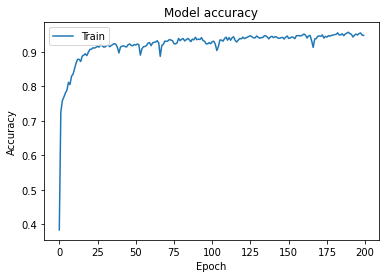

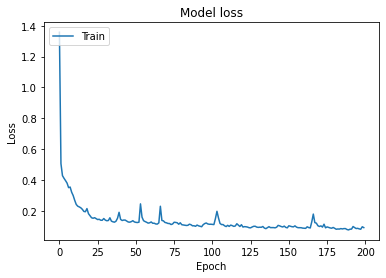

In [9]:
#Plot the model
 
plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
 
print(history.history.keys())
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#print (model.predict_classes(Test_X[:1,]))
#model.save('my_model.h5')
#Test_X[0]